# AB Testing


A/B testing, also known as split testing, refers to a randomized experimentation process where two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drive business metrics

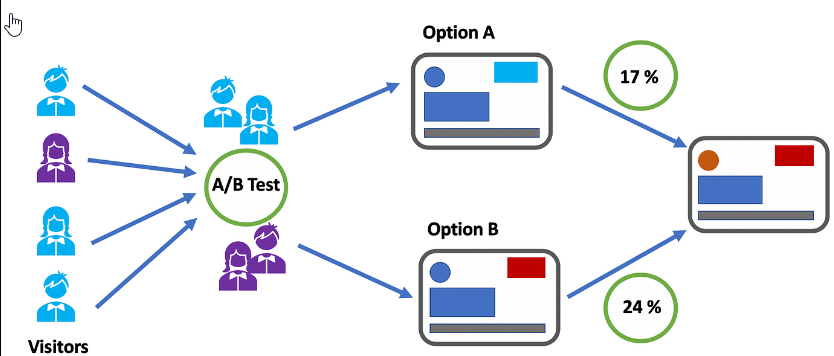

**Context**

Facebook recently introduced a new type of bidding, average bidding, as an alternative to the current type of bidding called maximum bidding. The system works in such a way that whoever pays more, its advertisement is shown to users more.

We can say that; show this ad but I will pay maximum 10 USD or 6 USD on average per impression. If someone else pays maximum of 9 USD or an average of 5 USD to show their ads to the target customer, our ad will be shown to the user, because of the our higher offer.

In this dataset you can find the analysis result of comparison of these two product regarding observations in last 40 days

**Business Problem**

As a company that will advertise on Facebook, we want to understand which option is more advantageous for us.

Which of these two options will increase our number of clicks and purchases?

Is there a significant difference between the two options?

To find the answer to these questions, we are applying the AB Test today.


**Task Details**

Importing Libraries and Data

Data Preprocessing

Analyse

A/B Test 

Evaluation of the Results

**Attribute Information:**

Impression : Ad impressions

Click : Number of clicks on the displayed ad

Purchase : The number of products purchased after the ads clicked

Earning: Earnings after purchased products


# Procedure




1. **Formulate Hypotheses**:
   - **Null Hypothesis (H0)**: There is no statistically significant difference between the two groups.
   - **Alternative Hypothesis (H1)**: There is a statistically significant difference between the two groups.

2. **Assumption Checks**:

   a. **Normality Assumption (Shapiro-Wilk Test)**:
      - H0: Data follows a normal distribution.
      - H1: Data does not follow a normal distribution.

   b. **Homogeneity of Variance (Levene Test)**:
      - H0: The variances between the two groups are equal (homogeneous).
      - H1: The variances between the two groups are not equal (heterogeneous).

   - Both tests are used to check assumptions for independent samples.

3. **Hypothesis Testing**:
   - Depending on the status of the assumptions, two different tests are conducted:

   a. **If Assumptions Are Met - Independent Two-Sample t-Test**:
      - H0: There is no statistically significant difference between the two groups.
      - H1: There is a statistically significant difference between the two groups.

   b. **If Normality or Homogeneity of Variance Assumptions Are Not Met - Mann-Whitney U Test**:
      - The Mann-Whitney U test is used when these assumptions are violated, and it is used to determine differences in medians.

4. **Interpret Results Based on the p-value**:

   - In the case of the independent two-sample t-test:
      - If p-value < α (the chosen significance level), H0 is rejected, and it is concluded that there is a statistically significant difference between the two groups.
      - If p-value ≥ α, the null hypothesis is not rejected, indicating no statistically significant difference.

In [10]:

import pandas as pd
#import matplotlib; matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [12]:
df_t = pd.read_excel("ab_testing.xlsx",sheet_name="Test Group")
df_c = pd.read_excel("ab_testing.xlsx",sheet_name="Control Group")
df_c["Bidding"] = "Control Group" #max
df_t["Bidding"] = "Test Group" #avg

In [13]:
df = pd.concat([df_c, df_t])
df.head()


,Impression,Click,Purchase,Earning,Bidding
0,82529.45927,6090.07732,665.21125,2311.27714,Control Group
1,98050.45193,3382.86179,315.08489,1742.80686,Control Group
2,82696.02355,4167.96575,458.08374,1797.82745,Control Group
3,109914.40040,4910.88224,487.09077,1696.22918,Control Group
4,108457.76263,5987.65581,441.03405,1543.72018,Control Group


In [14]:
df.groupby("Bidding")["Purchase"].mean()

Bidding
Control Group   550.89406
Test Group      582.10610
Name: Purchase, dtype: float64

**H0 : There is no statistically significant difference between the Control group that was served the “maximum bidding” campaign and the Test group that was served the “average bidding” campaign.**

**H1 : There is a statistically significant difference between the Control group that was served the “maximum bidding” campaign and the Test group that was served the “average bidding” campaign.**

**Before conducting a hypothesis test, assumption checks are performed. These include the Normality Assumption and Homogeneity of Variance.**

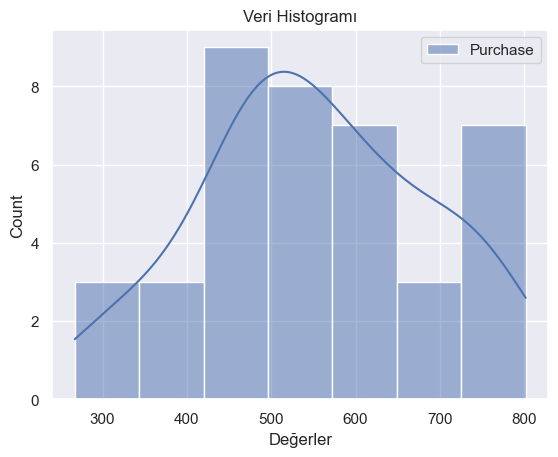

In [19]:
%matplotlib inline
data=df.loc[df["Bidding"] == "Control Group", "Purchase"]
data=pd.DataFrame(data)
sns.histplot(data, kde=True, color='g')
plt.title('Veri Histogramı')
plt.xlabel('Değerler')
plt.show()

In [20]:
test_stat, pvalue = shapiro(df.loc[df["Bidding"] == "Control Group", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


**p-value > ise 0.05 so it's normal distribution**

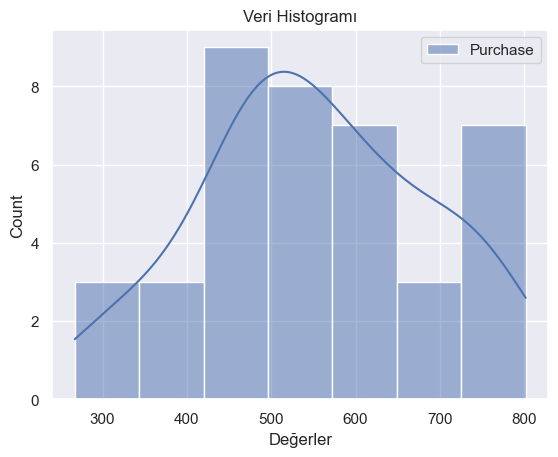

In [21]:
data2=df.loc[df["Bidding"] == "Test Group", "Purchase"]
data2=pd.DataFrame(data)
sns.histplot(data2, kde=True, color='g')
plt.title('Veri Histogramı')
plt.xlabel('Değerler')

plt.show()

In [16]:
test_stat, pvalue = shapiro(df.loc[df["Bidding"] == "Test Group", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


**p-value > ise 0.05 so it's normal distribution**

In [17]:
test_stat, pvalue = levene(df.loc[df["Bidding"] == "Control Group", "Purchase"],
                           df.loc[df["Bidding"] == "Test Group", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


**We could not reject p-value = 0.1083 > 0.05, so variances are homogeneous.**

**If Assumptions Are Met - Independent Two-Sample t-Test:**

**H0: There is no statistically significant difference between the two groups.**

**H1: There is a statistically significant difference between the two groups.**

In [18]:
test_stat, pvalue = ttest_ind(df.loc[df["Bidding"] == "Control Group", "Purchase"],
                           df.loc[df["Bidding"] == "Test Group", "Purchase"],
                            equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


**The p-value is 0.3493, which means we cannot reject the null hypothesis (H0). In other words, we cannot claim a significant difference between the two methods.**